# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("SAMPLE.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
btc_data = json.dumps(btc_response, indent=4, sort_keys=True)
btc_data


'{\n    "data": {\n        "1": {\n            "circulating_supply": 19098156,\n            "id": 1,\n            "last_updated": 1658289213,\n            "max_supply": 21000000,\n            "name": "Bitcoin",\n            "quotes": {\n                "USD": {\n                    "market_cap": 448388230765,\n                    "percent_change_1h": 0.0215621901741555,\n                    "percent_change_24h": 7.0750940578514,\n                    "percent_change_7d": 21.1644969539629,\n                    "percentage_change_1h": 0.0215621901741555,\n                    "percentage_change_24h": 7.0750940578514,\n                    "percentage_change_7d": 21.1644969539629,\n                    "price": 23446.0,\n                    "volume_24h": 51082572833\n                }\n            },\n            "rank": 1,\n            "symbol": "BTC",\n            "total_supply": 19098156,\n            "website_slug": "bitcoin"\n        }\n    },\n    "metadata": {\n        "error": null,\n

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
eth_data = json.dumps(eth_response, indent=4, sort_keys=True)
eth_data


'{\n    "data": {\n        "1027": {\n            "circulating_supply": 119747641,\n            "id": 1027,\n            "last_updated": 1658289211,\n            "max_supply": 119747641,\n            "name": "Ethereum",\n            "quotes": {\n                "USD": {\n                    "market_cap": 187067507250,\n                    "percent_change_1h": 0.585832815648159,\n                    "percent_change_24h": 2.71610372510629,\n                    "percent_change_7d": 49.9445966038219,\n                    "percentage_change_1h": 0.585832815648159,\n                    "percentage_change_24h": 2.71610372510629,\n                    "percentage_change_7d": 49.9445966038219,\n                    "price": 1560.62,\n                    "volume_24h": 23495486087\n                }\n            },\n            "rank": 2,\n            "symbol": "ETH",\n            "total_supply": 119747641,\n            "website_slug": "ethereum"\n        }\n    },\n    "metadata": {\n        "erro

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price


23446.0

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price =  eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price


1560.62

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(btc_value)


28135.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
eth_value


8271.285999999998

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


36406.486

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
)
    


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe="1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-07-11", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_prices = api.get_bars(
    tickers,
    timeframe=timeframe,
    start=start_date,
    end=start_date,
).df
    
# Reorganize the DataFrame
# Separate ticker data
spy = closing_prices[closing_prices["symbol"] == "SPY"].drop("symbol", axis=1)
agg = closing_prices[closing_prices["symbol"] == "AGG"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
to_merge_dict = {"SPY": spy, "AGG": agg}
spyagg_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

# Review the first 5 rows of the Alpaca DataFrame
spyagg_df.head()


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2022-07-11 04:00:00+00:00  385.91  386.87  383.5  384.23  58100363   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.92  101.6029   

                                                                   
                           close   volume trade_count        vwap  
timestamp                                                          
2022-07-11 04:00:00+00:00  101.7  5758310       17084  101.720884

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(spyagg_df["AGG"]["close"])

# Print the AGG closing price
agg_close_price

101.7

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(spyagg_df["SPY"]["close"])

# Print the SPY closing price
spy_close_price

384.23

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


20340.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price
# Print the current value of the stock portfolio
spy_value


42265.3

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


62605.3

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = float(total_stocks_bonds + total_crypto_wallet)

# Print current portfolio balance
total_portfolio


99011.786

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data


[36406.486, 62605.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
savings_df


,amount
crypto,36406.486
stock/bond,62605.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='amount'>], dtype=object)

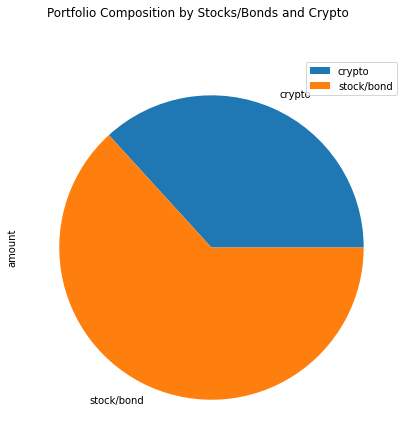

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind="pie", subplots=True, figsize=(15,7), title="Portfolio Composition by Stocks/Bonds and Crypto")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
def check_emergency_fund(total_portfolio, emergency_fund_value):
    if total_portfolio > emergency_fund_value:
        return "Congratulations! You have more than enough money in your savings for an emergency fund!"
    if total_portfolio == emergency_fund_value:
        return "Congratulations! You have enough money in your savings for an emergency fund!"
    if total_portfolio < emergency_fund_value:
        return f"You need to save an additional: ${emergency_fund_value - total_portfolio: .2f} in order to cover your emergency fund"
    
check_emergency_fund(total_portfolio, emergency_fund_value)


'Congratulations! You have more than enough money in your savings for an emergency fund!'

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [30]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_three_date = "2019-07-19"
end_three_date = "2022-07-17"

In [33]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_years_data = api.get_bars(
    tickers,
    timeframe=timeframe,
    start=start_three_date,
    end=end_three_date,
).df
# Reorganize the DataFrame
# Separate ticker data
spy_three_years = three_years_data[three_years_data["symbol"] == "AGG"].drop("symbol", axis=1)
agg_three_years = three_years_data[three_years_data["symbol"] == "AGG"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
to_merge_three_keys = {"SPY": spy_three_years, "AGG": agg_three_years}
stocks_bonds_three_years = pd.concat(to_merge_three_keys.values(), axis=1, keys=to_merge_three_keys.keys())
# Display both the first and last five rows of the DataFrame
display(stocks_bonds_three_years.head())
display(stocks_bonds_three_years.tail())


SPY                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-07-19 04:00:00+00:00  111.22  111.286  111.1400  111.17  3150774   
2019-07-22 04:00:00+00:00  111.41  111.410  111.3000  111.31  2855073   
2019-07-23 04:00:00+00:00  111.27  111.320  111.1600  111.20  2659305   
2019-07-24 04:00:00+00:00  111.33  111.410  111.2950  111.36  2783461   
2019-07-25 04:00:00+00:00  111.33  111.330  111.0474  111.19  2977486   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-07-19 04:00:00+00:00        9948  111.225017  111.22  111.286  111.1400   
2019-07-22 04:00:00+00:00        7937  111.344721  111.41  111.410  111.3000   
2019-07-23 04:00:00+00:00       10894  111.219201  111.27  111.320  111.1600   
2019-07-24 04:00:00+00:00       12750  111.337833  111.33  111.410  111.2950   
2019-07-25 04:00:00+00:00       11325  111.190464  111.33  111.330  111.0474   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-19 04:00:00+00:00  111.17  3150774        9948  111.225017  
2019-07-22 04:00:00+00:00  111.31  2855073        7937  111.344721  
2019-07-23 04:00:00+00:00  111.20  2659305       10894  111.219201  
2019-07-24 04:00:00+00:00  111.36  2783461       12750  111.337833  
2019-07-25 04:00:00+00:00  111.19  2977486       11325  111.190464

SPY                                     \
                             open    high       low   close   volume   
timestamp                                                              
2022-07-11 04:00:00+00:00  101.67  101.92  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.19  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.24  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.98  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.35  101.9000  102.25  8440151   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-07-11 04:00:00+00:00       17084  101.720884  101.67  101.92  101.6029   
2022-07-12 04:00:00+00:00       21057  102.039440  102.02  102.19  101.8200   
2022-07-13 04:00:00+00:00       26716  101.977478  101.23  102.24  101.1900   
2022-07-14 04:00:00+00:00       24722  101.747120  101.51  101.98  101.3300   
2022-07-15 04:00:00+00:00       27300  102.214854  101.94  102.35  101.9000   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478  
2022-07-14 04:00:00+00:00  101.85  6224496       24722  101.747120  
2022-07-15 04:00:00+00:00  102.25  8440151       27300  102.214854

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [35]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
stocks_bonds_simulation_thirty_years = MCSimulation(
    portfolio_data=stocks_bonds_three_years,
    weights=[0.60, 0.40],
    num_simulation=500,
    num_trading_days=252*30,
)
    
# Review the simulation input data
display(stocks_bonds_simulation_thirty_years.portfolio_data.head())

SPY                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-07-19 04:00:00+00:00  111.22  111.286  111.1400  111.17  3150774   
2019-07-22 04:00:00+00:00  111.41  111.410  111.3000  111.31  2855073   
2019-07-23 04:00:00+00:00  111.27  111.320  111.1600  111.20  2659305   
2019-07-24 04:00:00+00:00  111.33  111.410  111.2950  111.36  2783461   
2019-07-25 04:00:00+00:00  111.33  111.330  111.0474  111.19  2977486   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-19 04:00:00+00:00        9948  111.225017          NaN  111.22   
2019-07-22 04:00:00+00:00        7937  111.344721     0.001259  111.41   
2019-07-23 04:00:00+00:00       10894  111.219201    -0.000988  111.27   
2019-07-24 04:00:00+00:00       12750  111.337833     0.001439  111.33   
2019-07-25 04:00:00+00:00       11325  111.190464    -0.001527  111.33   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-07-19 04:00:00+00:00  111.286  111.1400  111.17  3150774        9948   
2019-07-22 04:00:00+00:00  111.410  111.3000  111.31  2855073        7937   
2019-07-23 04:00:00+00:00  111.320  111.1600  111.20  2659305       10894   
2019-07-24 04:00:00+00:00  111.410  111.2950  111.36  2783461       12750   
2019-07-25 04:00:00+00:00  111.330  111.0474  111.19  2977486       11325   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-19 04:00:00+00:00  111.225017          NaN  
2019-07-22 04:00:00+00:00  111.344721     0.001259  
2019-07-23 04:00:00+00:00  111.219201    -0.000988  
2019-07-24 04:00:00+00:00  111.337833     0.001439  
2019-07-25 04:00:00+00:00  111.190464    -0.001527

In [41]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation_returns = stocks_bonds_simulation_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bengu\documents\monte_carlo_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

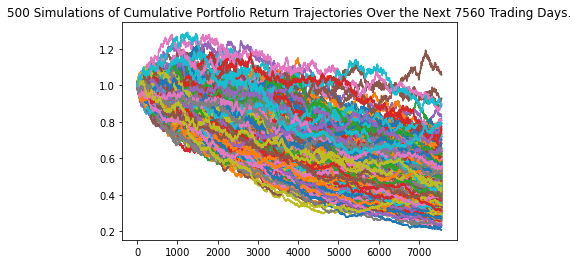

In [42]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
stocks_bonds_simulation_thirty_years.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

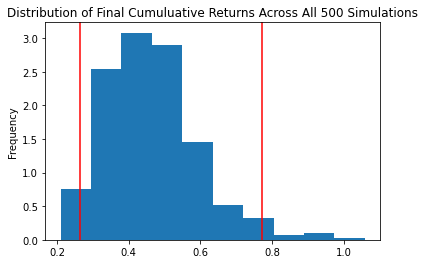

In [43]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
stocks_bonds_simulation_thirty_years.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [46]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_year_summary = stocks_bonds_simulation_thirty_years.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
display(thirty_year_summary)

count           500.000000
mean              0.462113
std               0.128791
min               0.209373
25%               0.364599
50%               0.450820
75%               0.533331
max               1.059333
95% CI Lower      0.263718
95% CI Upper      0.771051
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [47]:
# Print the current balance of the stock and bond portion of the members portfolio
total_portfolio

99011.786

In [52]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirty_year_summary["95% CI Lower"]
ci_upper_thirty_cumulative_return = thirty_year_summary["95% CI Upper"]

# Print the result of your calculations
display(f"With 95% confidence the portfolio in thirty years will be between: ${ci_lower_thirty_cumulative_return * total_portfolio: .2f} and ${ci_upper_thirty_cumulative_return * total_portfolio: .2f}")


'The portfolio in thirty years will be between: $ 26111.20 and $ 76343.13'

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [56]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
stocks_bonds_simulation_ten_years = MCSimulation(
    portfolio_data=stocks_bonds_three_years,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252*10,
)
    
# Review the simulation input data
display(stocks_bonds_simulation_ten_years.portfolio_data.head())

SPY                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-07-19 04:00:00+00:00  111.22  111.286  111.1400  111.17  3150774   
2019-07-22 04:00:00+00:00  111.41  111.410  111.3000  111.31  2855073   
2019-07-23 04:00:00+00:00  111.27  111.320  111.1600  111.20  2659305   
2019-07-24 04:00:00+00:00  111.33  111.410  111.2950  111.36  2783461   
2019-07-25 04:00:00+00:00  111.33  111.330  111.0474  111.19  2977486   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-19 04:00:00+00:00        9948  111.225017          NaN  111.22   
2019-07-22 04:00:00+00:00        7937  111.344721     0.001259  111.41   
2019-07-23 04:00:00+00:00       10894  111.219201    -0.000988  111.27   
2019-07-24 04:00:00+00:00       12750  111.337833     0.001439  111.33   
2019-07-25 04:00:00+00:00       11325  111.190464    -0.001527  111.33   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-07-19 04:00:00+00:00  111.286  111.1400  111.17  3150774        9948   
2019-07-22 04:00:00+00:00  111.410  111.3000  111.31  2855073        7937   
2019-07-23 04:00:00+00:00  111.320  111.1600  111.20  2659305       10894   
2019-07-24 04:00:00+00:00  111.410  111.2950  111.36  2783461       12750   
2019-07-25 04:00:00+00:00  111.330  111.0474  111.19  2977486       11325   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-19 04:00:00+00:00  111.225017          NaN  
2019-07-22 04:00:00+00:00  111.344721     0.001259  
2019-07-23 04:00:00+00:00  111.219201    -0.000988  
2019-07-24 04:00:00+00:00  111.337833     0.001439  
2019-07-25 04:00:00+00:00  111.190464    -0.001527

In [57]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
stocks_bonds_simulation_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bengu\documents\monte_carlo_simulation\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997085,0.995423,0.996296,1.000654,0.998077,0.995958,0.997271,1.001756,0.998888,1.004184,...,0.991680,0.996776,0.997219,1.004783,0.999109,0.996045,0.999177,0.995906,1.000190,0.997355
2,0.997405,0.998026,0.998042,0.998189,0.989354,0.998392,0.997683,1.000379,1.003657,1.004490,...,0.989325,0.996531,0.999054,1.010167,1.003652,0.990210,0.998813,0.993198,0.995352,0.993816
3,0.992896,0.996409,0.995260,0.994133,0.990591,1.001044,0.998623,1.002012,1.005637,1.006316,...,0.993663,0.988204,1.001554,1.015128,1.006954,0.987054,0.998964,0.994811,0.994269,0.991815
4,0.988011,0.994203,0.997441,0.995623,0.984154,0.999835,0.999120,0.998523,1.007980,1.001219,...,0.986591,0.985117,0.996700,1.017272,1.011576,0.989724,1.004393,0.998054,0.993636,0.986850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.682388,0.701580,0.699089,0.761016,0.798056,0.814262,0.888725,0.791289,0.638438,0.709233,...,0.771732,0.786085,0.792052,0.852240,0.754873,0.811715,0.645699,0.801273,0.667661,0.651183
2517,0.684656,0.700672,0.699273,0.764848,0.795050,0.811081,0.888805,0.792905,0.637766,0.710498,...,0.773883,0.786888,0.785548,0.852225,0.751841,0.810910,0.642108,0.796109,0.665779,0.655851
2518,0.683590,0.699840,0.697430,0.763925,0.796016,0.815081,0.890019,0.790642,0.637730,0.711495,...,0.775361,0.783932,0.788423,0.852083,0.750453,0.806699,0.646361,0.792408,0.662714,0.660683
2519,0.684474,0.699899,0.698240,0.761047,0.796919,0.814880,0.888624,0.787359,0.635686,0.708012,...,0.776278,0.787415,0.787972,0.849172,0.747705,0.807756,0.650108,0.793985,0.661715,0.660616


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

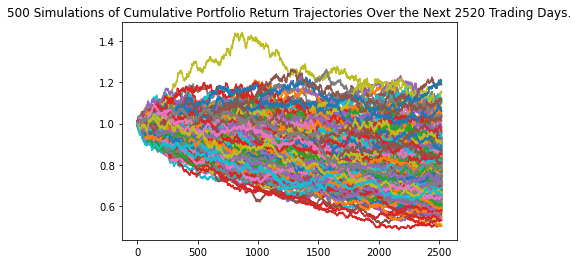

In [58]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
stocks_bonds_simulation_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

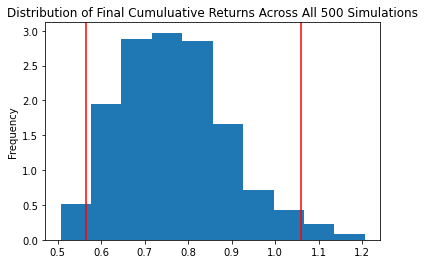

In [59]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
stocks_bonds_simulation_ten_years.plot_distribution()

In [61]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_year_summary = stocks_bonds_simulation_ten_years.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(ten_year_summary)

count           500.000000
mean              0.767355
std               0.125502
min               0.506415
25%               0.675138
50%               0.759899
75%               0.845891
max               1.206179
95% CI Lower      0.564898
95% CI Upper      1.058503
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [62]:
# Print the current balance of the stock and bond portion of the members portfolio
total_portfolio

99011.786

In [67]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_year_summary["95% CI Lower"] 
ci_upper_ten_cumulative_return = ten_year_summary["95% CI Upper"] 

# Print the result of your calculations
display(f"With 95% confidence the portfolio in thirty years will be between: ${ci_lower_ten_cumulative_return * total_portfolio: .2f} and ${ci_upper_ten_cumulative_return * total_portfolio: .2f}")

'With 95% confidence the portfolio in thirty years will be between: $ 55931.55 and $ 104804.30'

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?